# Tugas Besar IF2220 Probabilitas dan Statistika
### Penarikan Kesimpulan dan Pengujian Hipotesis
Anggota:
1. Primanda Adyatma Hafiz - 13520022
2. Hansel Valentino Tanoto - 13520046


In [10]:
# module
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.stats as st
import seaborn as sns
import math



## Read File

In [2]:
# read file
water_potability = pd.read_csv('water_potability.csv', header=None)
# set kolom 
water_potability.columns = ['id', 'pH', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'OrganicCarbon', 'Trihalomethanes', 'Turbidity', 'Potability']

water_potability

,id,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,OrganicCarbon,Trihalomethanes,Turbidity,Potability
0,1,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
1,2,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
2,3,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
3,4,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
4,5,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...,...
2005,2006,8.197353,203.105091,27701.794055,6.472914,328.886838,444.612724,14.250875,62.906205,3.361833,1
2006,2007,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
2007,2008,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
2008,2009,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1


## Info Atribut

In [3]:
water_potability.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2010 entries, 0 to 2009
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2010 non-null   int64  
 1   pH               2010 non-null   float64
 2   Hardness         2010 non-null   float64
 3   Solids           2010 non-null   float64
 4   Chloramines      2010 non-null   float64
 5   Sulfate          2010 non-null   float64
 6   Conductivity     2010 non-null   float64
 7   OrganicCarbon    2010 non-null   float64
 8   Trihalomethanes  2010 non-null   float64
 9   Turbidity        2010 non-null   float64
 10  Potability       2010 non-null   int64  
dtypes: float64(9), int64(2)
memory usage: 172.9 KB


## Soal 1
Menulis deskripsi statistika (Descriptive Statistics) dari semua kolom pada data yang bersifat
numerik, terdiri dari mean, median, modus, standar deviasi, variansi, range, nilai minimum,
maksimum, kuartil, IQR, skewness dan kurtosis.

##### a. Mean, Standar Deviasi, Nilai Minimum, Quartile, Nilai Maksimum, Median, Variance, Range, IQR, Skewness, dan Kurtosis

In [4]:
numeric_column = water_potability.loc[:, water_potability.columns!='id']
desc = numeric_column.describe()

# Median
desc.loc['median'] = numeric_column.median()

# Variance
desc.loc['variance'] = numeric_column.var()

# Range
desc.loc['range'] = numeric_column.max()-numeric_column.min()

# Interquartile Range
desc.loc['IQR'] = numeric_column.quantile(0.75) - numeric_column.quantile(0.25)

# Skewness
desc.loc['skewness'] = numeric_column.skew()

# Kurtosis
desc.loc['kurtosis'] = numeric_column.kurtosis()

desc

,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,OrganicCarbon,Trihalomethanes,Turbidity,Potability
count,2010.000000,2010.000000,2.010000e+03,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000
mean,7.087193,195.969209,2.190467e+04,7.134322,333.211376,426.476708,14.357940,66.400717,3.969497,0.402985
std,1.572803,32.643166,8.625398e+03,1.585214,41.211111,80.701872,3.325770,16.081109,0.780471,0.490620
min,0.227499,73.492234,3.209426e+02,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000,0.000000
25%,6.090785,176.740657,1.561441e+04,6.138326,307.626986,366.619219,12.122530,55.949993,3.442882,0.000000
50%,7.029490,197.203525,2.092688e+04,7.142014,332.214113,423.438372,14.323286,66.482041,3.967374,0.000000
75%,8.053006,216.447589,2.717053e+04,8.109933,359.268147,482.209772,16.683562,77.294613,4.514663,1.000000
max,14.000000,317.338124,5.648867e+04,13.127000,481.030642,753.342620,27.006707,124.000000,6.494749,1.000000
median,7.029490,197.203525,2.092688e+04,7.142014,332.214113,423.438372,14.323286,66.482041,3.967374,0.000000
variance,2.473709,1065.576277,7.439749e+07,2.512904,1698.355672,6512.792113,11.060746,258.602066,0.609135,0.240708


##### b. Modus untuk masing masing atribut

In [5]:
# Modus Atribut Non-Target
non_target = numeric_column.loc[:, numeric_column.columns!='Potability']
Modus = non_target.mode()
Modus

,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,OrganicCarbon,Trihalomethanes,Turbidity
0,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000
1,0.989912,77.459586,1198.943699,1.920271,180.206746,210.319182,4.371899,14.343161,1.492207
2,1.431782,81.710895,1351.906979,2.397985,182.397370,233.907965,4.466772,15.684877,1.496101
3,1.757037,94.091307,1372.091043,2.456014,187.170714,245.859632,4.861631,16.291505,1.680554
4,1.985383,94.812545,2552.962804,2.458609,187.424131,252.968328,4.966862,17.527765,1.812529
...,...,...,...,...,...,...,...,...,...
2005,11.568768,286.567991,50793.898917,12.580026,458.441072,666.690618,23.569645,114.034946,6.307678
2006,11.898078,287.975540,53735.899194,12.626900,460.107069,669.725086,23.604298,114.208671,6.357439
2007,12.246928,300.292476,55334.702799,12.653362,475.737460,695.369528,23.917601,116.161622,6.389161
2008,13.349889,306.627481,56351.396304,13.043806,476.539717,708.226364,24.755392,120.030077,6.494249


- Data atribut non target bersifat unik sehingga setiap data hanya muncul 1 kali. Akibatnya atribut setiap atribut non target memiliki modus sebanyak jumlah data, yaitu 2010 buah.

In [6]:
# Modus pH
Potability = numeric_column.loc[:, numeric_column.columns=='Potability']
Modus_Potability = Potability.mode()
Modus_Potability

,Potability
0,0


- Data atribut target (Potability) hanya terdiri dari 2 jenis yaitu 1 dan 0. Mayoritas data target bernilai 0 sehingga modusnya adalah 0.

## Soal 2
Membuat Visualisasi plot distribusi, dalam bentuk histogram dan boxplot untuk setiap kolom numerik. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot tersebut.

##### a. Atribut pH

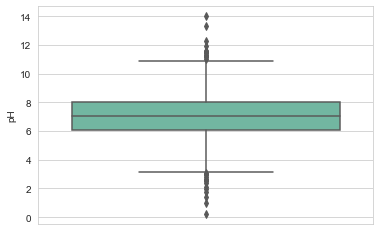

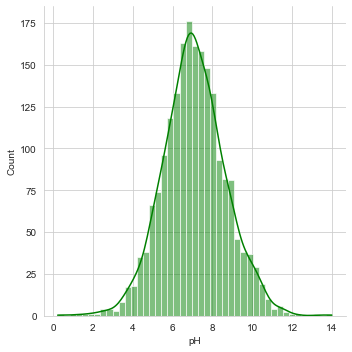

In [7]:
sns.set_style("whitegrid")
# Keseluruhan Data
sns.boxplot(y = 'pH', data = water_potability, palette = 'Set2')
sns.displot(x = 'pH', data = water_potability, kde = True, color = 'Green')

##### b. Atribut Hardness

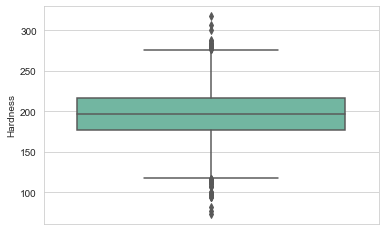

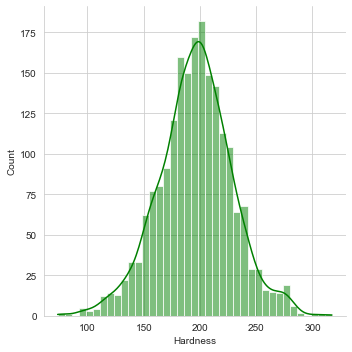

In [9]:
# Keseluruhan Data
sns.boxplot(y = 'Hardness', data = water_potability, palette = 'Set2')
sns.displot(x = 'Hardness', data = water_potability, kde = True, color = 'Green')

##### c. Atribut Solids

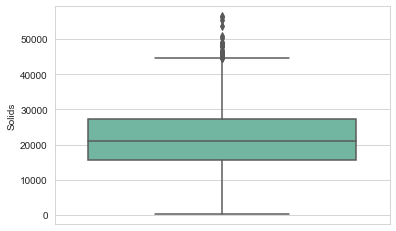

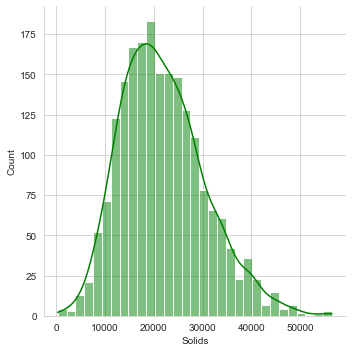

In [11]:
# Keseluruhan Data
sns.boxplot(y = 'Solids', data = water_potability, palette = 'Set2')
sns.displot(x = 'Solids', data = water_potability, kde = True, color = 'Green')

##### d. Atribut Chloramines

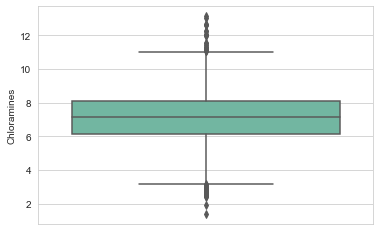

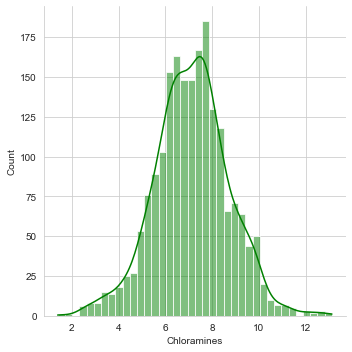

In [13]:
# Keseluruhan Data
sns.boxplot(y = 'Chloramines', data = water_potability, palette = 'Set2')
sns.displot(x = 'Chloramines', data = water_potability, kde = True, color = 'Green')

##### e. Atribut Sulfate

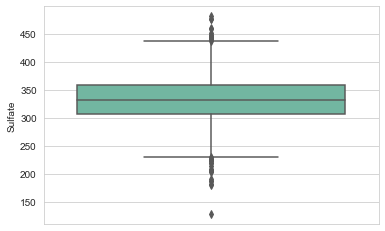

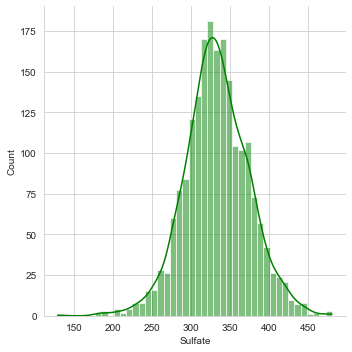

In [15]:
# Keseluruhan Data
sns.boxplot(y = 'Sulfate', data = water_potability, palette = 'Set2')
sns.displot(x = 'Sulfate', data = water_potability, kde = True, color = 'Green')

##### f. Atribut Conductivity

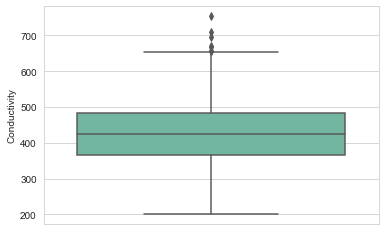

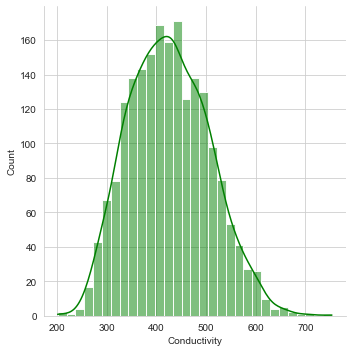

In [17]:
# Keseluruhan Data
sns.boxplot(y = 'Conductivity', data = water_potability, palette = 'Set2')
sns.displot(x = 'Conductivity', data = water_potability, kde = True, color = 'Green')

##### g. Atribut OrganicCarbon

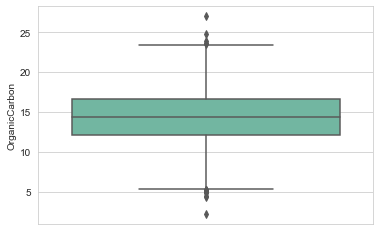

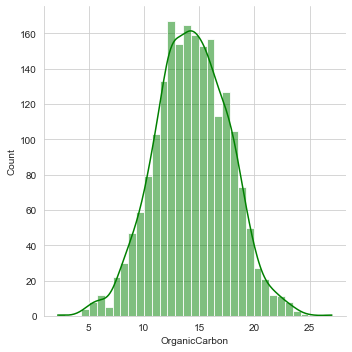

In [19]:
# Keseluruhan Data
sns.boxplot(y = 'OrganicCarbon', data = water_potability, palette = 'Set2')
sns.displot(x = 'OrganicCarbon', data = water_potability, kde = True, color = 'Green')

##### h. Atribut Trihalomethanes

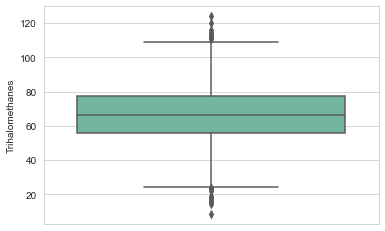

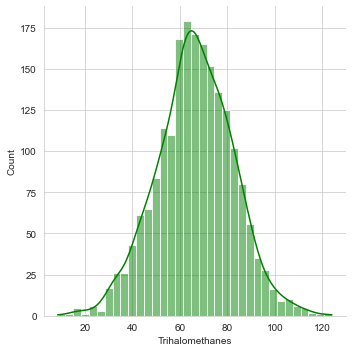

In [21]:
# Keseluruhan Data
sns.boxplot(y = 'Trihalomethanes', data = water_potability, palette = 'Set2')
sns.displot(x = 'Trihalomethanes', data = water_potability, kde = True, color = 'Green')

##### i. Atribut Turbidity

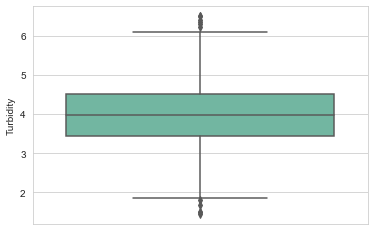

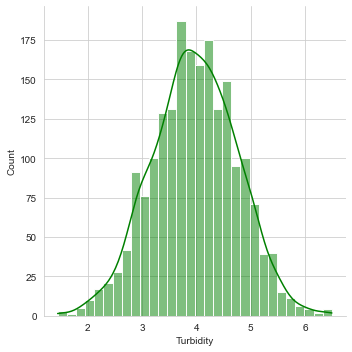

In [23]:
# Keseluruhan Data
sns.boxplot(y = 'Turbidity', data = water_potability, palette = 'Set2')
sns.displot(x = 'Turbidity', data = water_potability, kde = True, color = 'Green')

## Soal 3
Menentukan setiap kolom numerik berdistribusi normal atau tidak

Metode yang digunakan yakni dengan melihat kelancipan dari histogram (kurtosis) serta kesimetrian dari histogram (skewness). Sebuah data dikatakan berdistribusi normal bila distribusi nilainya tidak membentuk histogram yang terlalu landai ataupun terlalu lancip serta histogram juga simetri pada titik mean, median, dan modus

##### a. Atribut pH

Berdasarkan distribusi data atribut pH dari histogram diperoleh kurva yang simetri, namun kurva memiliki bentuk yang cenderung lancip sehingga tidak dapat diklasifikasikan sebagai kurva berdistribusi normal

##### b. Atribut Hardness

Berdasarkan distribusi data atribut Hardness dari histogram diperoleh kurva yang simetri, namun kurva memiliki bentuk yang cenderung lancip sehingga tidak dapat diklasifikasikan sebagai kurva berdistribusi normal

##### c. Atribut Solids

Berdasarkan distribusi data atribut Solids dari histogram diperoleh kurva yang tidak simetri karena kurva memiliki modus yang lebih kecil dibandingkan mean sehingga kurva cenderung landai untuk x yang lebih besar. Selain itu, kurva memiliki bentuk yang sedikit lancip sehingga tidak dapat diklasifikasikan sebagai kurva berdistribusi normal

##### d. Atribut Chloramines

Berdasarkan distribusi data atribut Chloramines dari histogram diperoleh kurva yang simetri, namun kurva memiliki bentuk yang sedikit lancip sehingga tidak dapat diklasifikasikan sebagai kurva berdistribusi normal

##### e. Atribut Sulfate

Berdasarkan distribusi data atribut Sulfate dari histogram diperoleh kurva yang tidak simetri karena kurva memiliki modus yang lebih besar dibandingkan mean sehingga kurva cenderung landai untuk x yang lebih kecil. Selain itu, kurva memiliki bentuk yang cenderung lancip sehingga tidak dapat diklasifikasikan sebagai kurva berdistribusi normal

##### f. Atribut Conductivity

Berdasarkan distribusi data atribut Conductivity dari histogram diperoleh kurva yang tidak simetri karena kurva memiliki modus yang lebih kecil dibandingkan mean sehingga kurva cenderung landai untuk x yang lebih kecil. Akan tetapi, kurva tidak terlalu lancip serta tidak terlalu landai. Oleh karena itu kurva tidak dapat diklasifikasikan sebagai kurva berdistribusi normal

##### g. Atribut OrganicCarbon

Berdasarkan distribusi data atribut OrganicCarbon dari histogram diperoleh kurva yang simetri, namun kurva memiliki bentuk yang sedikit lancip sehingga tidak dapat diklasifikasikan sebagai kurva berdistribusi normal

##### h. Atribut Trihalomethanes

Berdasarkan distribusi data atribut Trihalomethanes dari histogram diperoleh kurva yang simetri, namun kurva memiliki bentuk yang cenderung lancip sehingga tidak dapat diklasifikasikan sebagai kurva berdistribusi normal

##### i. Atribut Turbidity

Berdasarkan distribusi data atribut Turbidity dari histogram diperoleh kurva yang simetri, selain itu kurva tidak terlalu lancip maupun terlalu landai sehingga kurva dapat diklasifikasikan sebagai kurva yang berdistribusi normal

## Soal 4
Melakukan test hipotesis 1 sampel, dengan menuliskan 6 langkah testing dan menampilkan juga boxplotnya untuk kolom/bagian yang bersesuaian.

##### a. Nilai Rata-rata pH di atas 7?

Diketahui:
  x̄ = 7.0871927687138285
  σ = 1.5728029470456655
  n = 2010
  μ₀ = 7

Uji Hipotesis (mean):
1. Hipotesis nol
   H₀: μ = 7
2. Hipotesis alternatif
   H₁: μ > 7 (One tailed test)
3. Tingkat signifikan
   α = 0.05
4. Daerah kritis
   z > 1.645, diperoleh dari nilai z yang memenuhi P(Z < z) = 1 - α = 0.95
5. Perhitungan p-value
   z = (x̄ - μ₀) / (σ √n)
   z = (7.0871927687138285 - 7) / (1.5728029470456655 √2010)
   z = 0.001
   P(Z > 0.001) = 0.5005
6. Kesimpulan
   Nilai P > α, maka tidak menolak H₀ dan dapat disimpulkan nilai rata-rata pH di atas 7

Boxplot:


<AxesSubplot:ylabel='pH'>

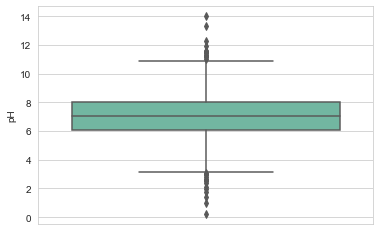

In [34]:
mu_0 = 7
alpha = 0.05
z_0 = st.norm.ppf(1 - alpha)
x_bar = water_potability['pH'].mean()
sigma = water_potability['pH'].std()
n = len(water_potability)
#print("Diketahui:\n  x̄ =", x_bar, "\n  μ₀ =", mu_0, "\n  σ =", sigma)
print("Diketahui:\n  x̄ = {}\n  σ = {}\n  n = {}\n  μ₀ = {}".format(x_bar, sigma, n, mu_0))
print("\nUji Hipotesis (mean):")
print("1. Hipotesis nol\n   H₀: μ = {}".format(mu_0))
print("2. Hipotesis alternatif\n   H₁: μ > {} (One tailed test)".format(mu_0))
print("3. Tingkat signifikan\n   α = {}".format(alpha))
print("4. Daerah kritis\n   z > {:.3f}, diperoleh dari nilai z yang memenuhi P(Z < z) = 1 - α = {}".format(z_0, (1 - alpha)))
print("5. Perhitungan p-value")
print("   z = (x̄ - μ₀) / (σ √n)")
print("   z = ({} - {}) / ({} √{})".format(x_bar, mu_0, sigma, n))
z = (x_bar - mu_0) / (sigma * np.sqrt(n))
print("   z = {:.3f}".format(z))
P = st.norm.cdf(z)
print("   P(Z > {:.3f}) = {:.4f}".format(z, P))
print("6. Kesimpulan")
if (P < alpha):
    print("   Nilai P < α, maka tolak H₀ dan dapat disimpulkan nilai rata-rata pH sama dengan {}".format(mu_0))
else:
    print("   Nilai P > α, maka tidak menolak H₀ dan dapat disimpulkan nilai rata-rata pH di atas {}".format(mu_0))

print("\nBoxplot:")
sns.boxplot(y = 'pH', data = water_potability, palette = 'Set2')


##### b. Nilai Rata-rata Hardness tidak sama dengan 205?

##### c. Nilai Rata-rata 100 baris pertama kolom Solids bukan 21900?

##### d. Proporsi nilai Conductivity yang lebih dari 450, adalah tidak sama dengan 10%?

##### e. Proporsi nilai Trihalomethanes yang kurang dari 40, adalah kurang dari 5%?

## Soal 5
Melakukan test hipotesis 2 sampel, dengan menuliskan 6 langkah testing dan menampilkan juga boxplotnya untuk kolom/bagian yang bersesuaian.

##### a. Data kolom Sulfate dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata kedua bagian tersebut sama?

Diketahui:
  x̄₁ = 331.30532950549565
  x̄₂ = 335.11742332488245
  σ₁ = 41.332754590968776
  σ₂ = 41.02112948764952
  n₁ = 1005
  n₂ = 1005
  d₀ = 0
  α = 0.05


Uji Hipotesis (mean):
1. Hipotesis nol
   H₀: μ₁-μ₂ = 0
2. Hipotesis alternatif
   H₁: μ₁-μ₂ > 0 atau μ₁-μ₂ < 0  (Two tailed test)
3. Tingkat signifikan
   α = 0.05
4. Daerah kritis
   z < -1.960 atau z > 1.960 , diperoleh dari nilai z yang memenuhi P(Z > z) = α/2 = 0.025 dan P(Z < z) = 1 - α/2 = 0.975
5. Perhitungan p-value
   z = ((x̄₁ - x̄₂) - μ₀) / (√(σ₁²/n₁ + σ₂²/n₂)
   z = ((331.30532950549565 - 335.11742332488245) - 0) / (√(41.332754590968776²/1005 + 41.02112948764952²/1005)
   z = -0.074
   P = 0.4707010325658625
6. Kesimpulan
   Nilai α/2 < P < 1 - α/2, maka tidak menolak H₀ dan dapat disimpulkan selisih nilai rata-rata Sulfate bagian awal dan bagian akhir sama

Boxplot:


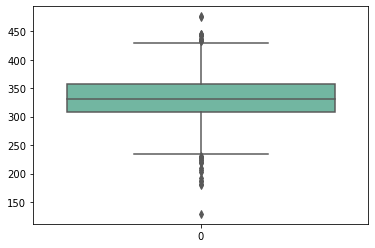

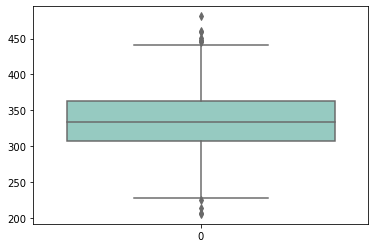

In [35]:
# Split data into two
dataSulfate1=water_potability["Sulfate"][:len(water_potability)//2]
dataSulfate2=water_potability["Sulfate"][len(water_potability)//2:len(water_potability)]

d_0=0
x_bar_1=dataSulfate1.mean()
x_bar_2=dataSulfate2.mean()
sigma_1=dataSulfate1.std()
sigma_2=dataSulfate2.std()
alpha=0.05
n_1=len(dataSulfate1)
n_2=len(dataSulfate2)
h_0=0
z_01=st.norm.ppf(alpha/2)
z_02=st.norm.ppf(1 - alpha/2)

print("Diketahui:\n  x̄₁ = {}\n  x̄₂ = {}\n  σ₁ = {}\n  σ₂ = {}\n  n₁ = {}\n  n₂ = {}\n  d₀ = {}\n  α = {}\n".format(x_bar_1,x_bar_2,sigma_1,sigma_2,n_1,n_2,d_0,alpha))
print("\nUji Hipotesis (mean):")
print("1. Hipotesis nol\n   H₀: μ₁-μ₂ = {}".format(h_0))
print("2. Hipotesis alternatif\n   H₁: μ₁-μ₂ > {} atau μ₁-μ₂ < {}  (Two tailed test)".format(h_0,h_0))
print("3. Tingkat signifikan\n   α = {}".format(alpha))
print("4. Daerah kritis\n   z < {:.3f} atau z > {:.3f} , diperoleh dari nilai z yang memenuhi P(Z > z) = α/2 = {} dan P(Z < z) = 1 - α/2 = {}".format(z_01,z_02,alpha/2, (1 - alpha/2)))
print("5. Perhitungan p-value")
print("   z = ((x̄₁ - x̄₂) - μ₀) / (√(σ₁²/n₁ + σ₂²/n₂)")
print("   z = (({} - {}) - {}) / (√({}²/{} + {}²/{})".format(x_bar_1,x_bar_2, d_0, sigma_1, n_1,sigma_2,n_2))
z = ((x_bar_1-x_bar_2) - d_0) / math.sqrt(sigma_1**2/n_1+sigma_2**2+n_2)
print("   z = {:.3f}".format(z))
P = st.norm.cdf(z)
print("   P = {}".format(P))
print("6. Kesimpulan")
if (P > 1-alpha/2):
    print("   Nilai P > 1 - α/2, maka tolak H₀ dan dapat disimpulkan selisih nilai rata-rata Sulfate bagian awal dan bagian akhir berbeda")
elif (P < alpha/2):
    print("   Nilai P < α/2, maka tolak H₀ dan dapat disimpulkan selisih nilai rata-rata Sulfate bagian awal dan bagian akhir berbeda")
else:
    print("   Nilai α/2 < P < 1 - α/2, maka tidak menolak H₀ dan dapat disimpulkan selisih nilai rata-rata Sulfate bagian awal dan bagian akhir sama")

print("\nBoxplot:")

sns.boxplot( data = dataSulfate1.values, palette = 'Set2')
plt.show()
sns.boxplot( data = dataSulfate2.values, palette = 'Set3')
plt.show()

##### b. Data kolom OrganicCarbon dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata bagian awal lebih besar dari pada bagian akhir sebesar 0.15?

Diketahui:
  x̄₁ = 14.253972723723393
  x̄₂ = 14.461907080372754
  σ₁ = 3.3511620707420766
  σ₂ = 3.2985726887318214
  n₁ = 1005
  n₂ = 1005
  d₀ = 0
  α = 0.05


Uji Hipotesis (mean):
1. Hipotesis nol
   H₀: μ₁-μ₂ = 0.15
2. Hipotesis alternatif
   H₁: μ₁-μ₂ > 0.15   (One tailed test)
3. Tingkat signifikan
   α = 0.05
4. Daerah kritis
   z > 1.645 , diperoleh dari nilai z yang memenuhi P(Z < z) = 1 - α = 0.95
5. Perhitungan p-value
   z = ((x̄₁ - x̄₂) - μ₀) / (√(σ₁²/n₁ + σ₂²/n₂)
   z = ((14.253972723723393 - 14.461907080372754) - 0) / (√(3.3511620707420766²/1005 + 3.2985726887318214²/1005)
   z = -0.007
   P = 0.4973973874468988
6. Kesimpulan
   Nilai P < 1 - α, maka tidak menolak H₀ dan dapat disimpulkan selisih nilai rata-rata OrganicCarbon bagian awal dan bagian akhir kurang dari 0.15

Boxplot:


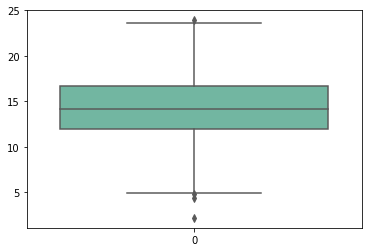

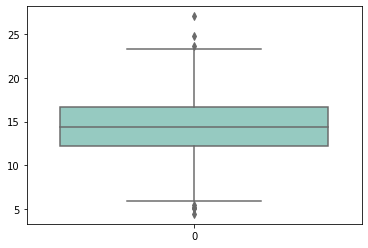

In [37]:
# Split data into two
dataOrganicCarbon1=water_potability["OrganicCarbon"][:len(water_potability)//2]
dataOrganicCarbon2=water_potability["OrganicCarbon"][len(water_potability)//2:len(water_potability)]

d_0=0
x_bar_1=dataOrganicCarbon1.mean()
x_bar_2=dataOrganicCarbon2.mean()
sigma_1=dataOrganicCarbon1.std()
sigma_2=dataOrganicCarbon2.std()
alpha=0.05
n_1=len(dataOrganicCarbon1)
n_2=len(dataOrganicCarbon2)
h_0=0.15
z_0=st.norm.ppf(1 - alpha)

print("Diketahui:\n  x̄₁ = {}\n  x̄₂ = {}\n  σ₁ = {}\n  σ₂ = {}\n  n₁ = {}\n  n₂ = {}\n  d₀ = {}\n  α = {}\n".format(x_bar_1,x_bar_2,sigma_1,sigma_2,n_1,n_2,d_0,alpha))
print("\nUji Hipotesis (mean):")
print("1. Hipotesis nol\n   H₀: μ₁-μ₂ = {}".format(h_0))
print("2. Hipotesis alternatif\n   H₁: μ₁-μ₂ > {}   (One tailed test)".format(h_0))
print("3. Tingkat signifikan\n   α = {}".format(alpha))
print("4. Daerah kritis\n   z > {:.3f} , diperoleh dari nilai z yang memenuhi P(Z < z) = 1 - α = {}".format(z_0,1-alpha))
print("5. Perhitungan p-value")
print("   z = ((x̄₁ - x̄₂) - μ₀) / (√(σ₁²/n₁ + σ₂²/n₂)")
print("   z = (({} - {}) - {}) / (√({}²/{} + {}²/{})".format(x_bar_1,x_bar_2, d_0, sigma_1, n_1,sigma_2,n_2))
z = ((x_bar_1-x_bar_2) - d_0) / math.sqrt(sigma_1**2/n_1+sigma_2**2+n_2)
print("   z = {:.3f}".format(z))
P = st.norm.cdf(z)
print("   P = {}".format(P))
print("6. Kesimpulan")
if (P > 1-alpha):
    print("   Nilai P > 1 - α, maka tolak H₀ dan dapat disimpulkan selisih nilai rata-rata OrganicCarbon bagian awal dan bagian akhir lebih dari {}".format(h_0))
else:
    print("   Nilai P < 1 - α, maka tidak menolak H₀ dan dapat disimpulkan selisih nilai rata-rata OrganicCarbon bagian awal dan bagian akhir kurang dari {}".format(h_0))

print("\nBoxplot:")

sns.boxplot( data = dataOrganicCarbon1.values, palette = 'Set2')
plt.show()
sns.boxplot( data = dataOrganicCarbon2.values, palette = 'Set3')
plt.show()

##### c. Rata-rata 100 baris pertama kolom Chloramines sama dengan 100 baris terakhirnya?

Diketahui:
  x̄₁ = 7.007771140423921
  x̄₂ = 7.147197636249925
  σ₁ = 1.4808922939392726
  σ₂ = 1.306806325954166
  n₁ = 100
  n₂ = 100
  d₀ = 0
  α = 0.05


Uji Hipotesis (mean):
1. Hipotesis nol
   H₀: μ₁-μ₂ = 0
2. Hipotesis alternatif
   H₁: μ₁-μ₂ > 0 atau μ₁-μ₂ < 0  (Two tailed test)
3. Tingkat signifikan
   α = 0.05
4. Daerah kritis
   z < -1.960 atau z > 1.960 , diperoleh dari nilai z yang memenuhi P(Z > z) = α/2 = 0.025 dan P(Z < z) = 1 - α/2 = 0.975
5. Perhitungan p-value
   z = ((x̄₁ - x̄₂) - μ₀) / (√(σ₁²/n₁ + σ₂²/n₂)
   z = ((7.007771140423921 - 7.147197636249925) - 0) / (√(1.4808922939392726²/100 + 1.306806325954166²/100)
   z = -0.014
   P = 0.49448535294654233
6. Kesimpulan
   Nilai α/2 < P < 1 - α/2, maka tidak menolak H₀ dan dapat disimpulkan selisih nilai rata-rata Chloramines bagian awal dan bagian akhir sama

Boxplot:


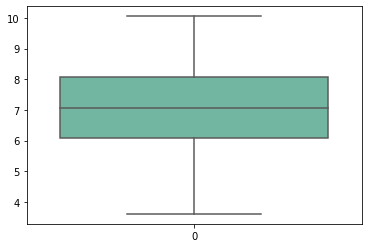

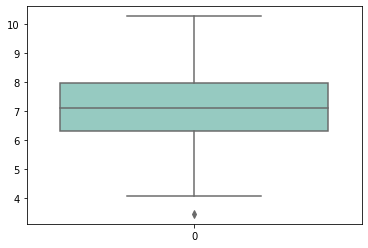

In [40]:
# Split data into two
dataChloramines1=water_potability["Chloramines"][:100]
dataChloramines2=water_potability["Chloramines"][-100:]

d_0=0
x_bar_1=dataChloramines1.mean()
x_bar_2=dataChloramines2.mean()
sigma_1=dataChloramines1.std()
sigma_2=dataChloramines2.std()
alpha=0.05
n_1=len(dataChloramines1)
n_2=len(dataChloramines2)
h_0=0
z_01=st.norm.ppf(alpha/2)
z_02=st.norm.ppf(1 - alpha/2)

print("Diketahui:\n  x̄₁ = {}\n  x̄₂ = {}\n  σ₁ = {}\n  σ₂ = {}\n  n₁ = {}\n  n₂ = {}\n  d₀ = {}\n  α = {}\n".format(x_bar_1,x_bar_2,sigma_1,sigma_2,n_1,n_2,d_0,alpha))
print("\nUji Hipotesis (mean):")
print("1. Hipotesis nol\n   H₀: μ₁-μ₂ = {}".format(h_0))
print("2. Hipotesis alternatif\n   H₁: μ₁-μ₂ > {} atau μ₁-μ₂ < {}  (Two tailed test)".format(h_0,h_0))
print("3. Tingkat signifikan\n   α = {}".format(alpha))
print("4. Daerah kritis\n   z < {:.3f} atau z > {:.3f} , diperoleh dari nilai z yang memenuhi P(Z > z) = α/2 = {} dan P(Z < z) = 1 - α/2 = {}".format(z_01,z_02,alpha/2, (1 - alpha/2)))
print("5. Perhitungan p-value")
print("   z = ((x̄₁ - x̄₂) - μ₀) / (√(σ₁²/n₁ + σ₂²/n₂)")
print("   z = (({} - {}) - {}) / (√({}²/{} + {}²/{})".format(x_bar_1,x_bar_2, d_0, sigma_1, n_1,sigma_2,n_2))
z = ((x_bar_1-x_bar_2) - d_0) / math.sqrt(sigma_1**2/n_1+sigma_2**2+n_2)
print("   z = {:.3f}".format(z))
P = st.norm.cdf(z)
print("   P = {}".format(P))
print("6. Kesimpulan")
if (P > 1-alpha/2):
    print("   Nilai P > 1 - α/2, maka tolak H₀ dan dapat disimpulkan selisih nilai rata-rata Chloramines bagian awal dan bagian akhir berbeda")
elif (P < alpha/2):
    print("   Nilai P < α/2, maka tolak H₀ dan dapat disimpulkan selisih nilai rata-rata Chloramines bagian awal dan bagian akhir berbeda")
else:
    print("   Nilai α/2 < P < 1 - α/2, maka tidak menolak H₀ dan dapat disimpulkan selisih nilai rata-rata Chloramines bagian awal dan bagian akhir sama")

print("\nBoxplot:")

sns.boxplot( data = dataChloramines1.values, palette = 'Set2')
plt.show()
sns.boxplot( data = dataChloramines2.values, palette = 'Set3')
plt.show()

##### d. Proporsi nilai bagian awal Turbidity yang lebih dari 4, adalah lebih besar daripada, proporsi nilai yang sama di bagian akhir Turbidity ?

##### e. Bagian awal kolom Sulfate memiliki variansi yang sama dengan bagian akhirnya?

## Soal 6
Test korelasi: tentukan apakah setiap kolom non-target berkorelasi dengan kolom target, dengan menggambarkan juga scatter plot nya. Gunakan correlation test.

Metode yang digunakan yaitu dengan mengecek koefisien korelasi untuk setiap atribut non-target terhadap atribut target. Jika diperoleh koefisien korelasi lebih dari 0.5 maka akan disimpulkan bahwa kedua atribut memiliki korelasi saling berbanding lurus. Sedangkan bila diperoleh koefisien korelasi kurang dari -0.5 akan disimpulkan bahwa kedua atribut memiliki korelasi saling berbanding terbalik. Kemudian bila tidak memenuhi dua kasus tersebut makan akan disimpulkan bahwa kedua atribut tidak berkorelasi

##### a. Korelasi pH - Potability

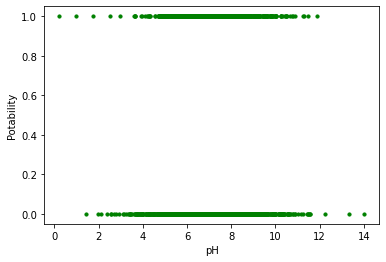

Koefisien korelasi = 0.015475094408433455


In [27]:
water_potability.plot.scatter(x="pH",y="Potability",s=10,c="green")
plt.show()
print("Koefisien korelasi =",water_potability["pH"].corr(water_potability["Potability"]))

Karena koefisien korelasi mendekati nol serta lebih dari -0.5 dan kurang dari 0.5 maka dapat disimpulkan atribut pH dan Potability tidak saling berkorelasi 

##### b. Korelasi Hardness - Potability

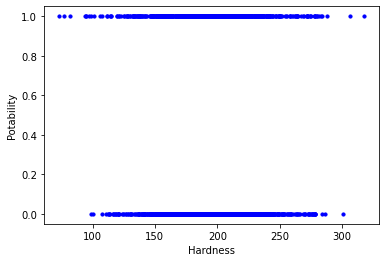

Koefisien korelasi = -0.00146315289594793


In [28]:
water_potability.plot.scatter(x="Hardness",y="Potability",s=10,c="blue")
plt.show()
print("Koefisien korelasi =",water_potability["Hardness"].corr(water_potability["Potability"]))

Karena koefisien korelasi mendekati nol serta lebih dari -0.5 dan kurang dari 0.5 maka dapat disimpulkan atribut Hardness dan Potability tidak saling berkorelasi 

##### c. Korelasi Solids - Potability

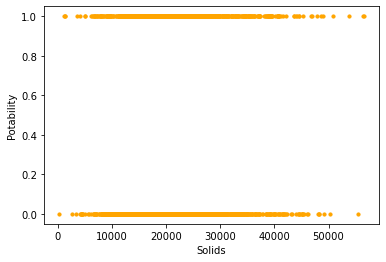

Koefisien korelasi = 0.038976578181734695


In [29]:
water_potability.plot.scatter(x="Solids",y="Potability",s=10,c="orange")
plt.show()
print("Koefisien korelasi =",water_potability["Solids"].corr(water_potability["Potability"]))

Karena koefisien korelasi mendekati nol serta lebih dari -0.5 dan kurang dari 0.5 maka dapat disimpulkan atribut Solids dan Potability tidak saling berkorelasi 

##### d. Korelasi Chloramines - Potability

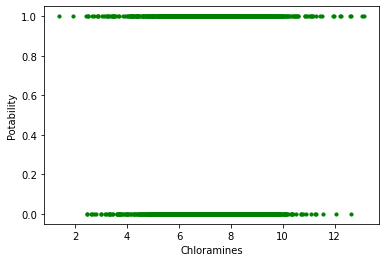

Koefisien korelasi = 0.02077892184052408


In [31]:
water_potability.plot.scatter(x="Chloramines",y="Potability",s=10,c="green")
plt.show()
print("Koefisien korelasi =",water_potability["Chloramines"].corr(water_potability["Potability"]))

Karena koefisien korelasi mendekati nol serta lebih dari -0.5 dan kurang dari 0.5 maka dapat disimpulkan atribut Chloramines dan Potability tidak saling berkorelasi 

##### e. Korelasi  Sulfate - Potability

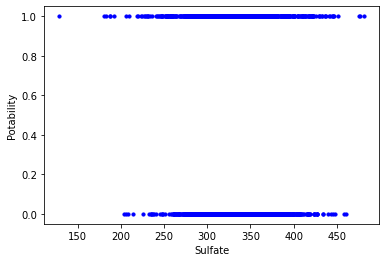

Koefisien korelasi = -0.015703164419273802


In [32]:
water_potability.plot.scatter(x="Sulfate",y="Potability",s=10,c="blue")
plt.show()
print("Koefisien korelasi =",water_potability["Sulfate"].corr(water_potability["Potability"]))

Karena koefisien korelasi mendekati nol serta lebih dari -0.5 dan kurang dari 0.5 maka dapat disimpulkan atribut Sulfate dan Potability tidak saling berkorelasi 

##### f. Korelasi  Conductivity - Potability

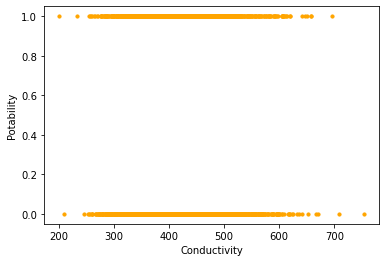

Koefisien korelasi = -0.016257120111377053


In [33]:
water_potability.plot.scatter(x="Conductivity",y="Potability",s=10,c="orange")
plt.show()
print("Koefisien korelasi =",water_potability["Conductivity"].corr(water_potability["Potability"]))

Karena koefisien korelasi mendekati nol serta lebih dari -0.5 dan kurang dari 0.5 maka dapat disimpulkan atribut Conductivity dan Potability tidak saling berkorelasi 

##### g. Korelasi  OrganicCarbon - Potability

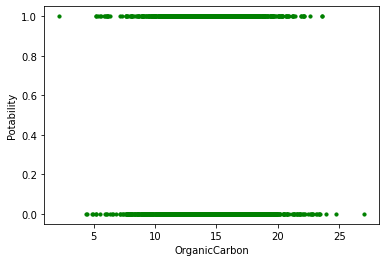

Koefisien korelasi = -0.015488461910747287


In [34]:
water_potability.plot.scatter(x="OrganicCarbon",y="Potability",s=10,c="green")
plt.show()
print("Koefisien korelasi =",water_potability["OrganicCarbon"].corr(water_potability["Potability"]))

Karena koefisien korelasi mendekati nol serta lebih dari -0.5 dan kurang dari 0.5 maka dapat disimpulkan atribut OrganicCarbon dan Potability tidak saling berkorelasi 

##### h. Korelasi  Trihalomethanes - Potability

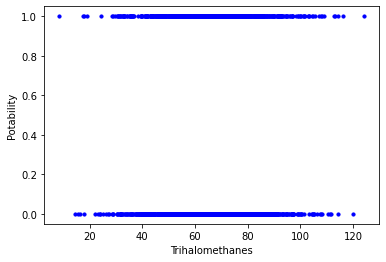

Koefisien korelasi = 0.009236711064713035


In [35]:
water_potability.plot.scatter(x="Trihalomethanes",y="Potability",s=10,c="blue")
plt.show()
print("Koefisien korelasi =",water_potability["Trihalomethanes"].corr(water_potability["Potability"]))

Karena koefisien korelasi mendekati nol serta lebih dari -0.5 dan kurang dari 0.5 maka dapat disimpulkan atribut Trihalomethanes dan Potability tidak saling berkorelasi 

##### i. Korelasi  Turbidity - Potability

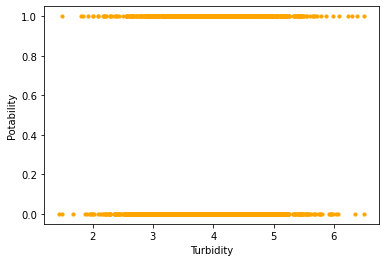

Koefisien korelasi = 0.022331042640622675


In [36]:
water_potability.plot.scatter(x="Turbidity",y="Potability",s=10,c="orange")
plt.show()
print("Koefisien korelasi =",water_potability["Turbidity"].corr(water_potability["Potability"]))

Karena koefisien korelasi mendekati nol serta lebih dari -0.5 dan kurang dari 0.5 maka dapat disimpulkan atribut Turbidity dan Potability tidak saling berkorelasi 